# Project Customer churn prediction
## Tran Thi Ky Phuong - HCMUS 

**1. Introduction:**

*Customer churn prediction is a critical aspect of business management, particularly for industries like telecommunications, internet service providers, pay TV companies, insurance firms, and alarm monitoring services. It involves understanding and addressing customer attrition, which refers to the loss of clients or customers.*

**2. Problem Statement:**

*For businesses in these sectors, measuring customer attrition is a vital business metric. This is because retaining an existing customer is significantly more cost-effective than acquiring a new one. As a result, these companies often have customer service branches dedicated to re-engaging customers who are considering leaving. This is because the long-term value of recovered customers far outweighs that of newly acquired ones.*
*To address customer churn, predictive analytics comes into play, churn prediction models to assess the likelihood of customers leaving. These models prioritize a small list of potential defectors, enabling businesses to concentrate their customer retention efforts on those who are most at risk of churning.*

**3.  Key Questions:**
 - *What is the significance of Churn Rate for stakeholders (Customers, MCI, etc.)?*
 - *What are the characteristics of each Type of Customer (Churn or Not Churn)?*
 - *Which ML modeling can be implemented and represent model results? including features input and explaining features important.*
 - *What actions regarding qualitative and quantitative analytics could be implemented to enhance retention rate?*
 - *This analysis aims to leverage comprehensive customer data to improve customer engagement and satisfaction for MCI's offerings.*


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Data Preparation

In [26]:
df = pd.read_csv('D:\Thuc Hanh\Data\customer_churn_data.csv')
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\TranPhuong\AppData\Local\Temp\ipykernel_14320\1172779440.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('D:\Thuc Hanh\Data\customer_churn_data.csv')


**Data Dictionary**
- *customer_id*: This is the customers’ unique id which identifies them bankwide.
- *credit_score*: this is the rating of the customers’ credit worthiness, generated based on the information on their credit report.
- *country*: This is the country the customer hails from.
- *gender*: This is the sex of the customer, grouped into male and female.
- *age*: This refers to the customer’s age.
- *tenure*: The number of years of relationship this customer has maintained with the bank.
- *balance*: The deductible balance on their bank account as at time this data was generated.
- *products_number*: This shows the bank account type the customer has.
- *credit_card*: This column shows if a customer has a credit card or not, represented as either 1 or 0 respectively.
- *active_member*: These numerical values show whether an account is active or not, represented as either 1 or 0 respectively.
- *estimated_ salary*: This is the average annual salary received into the account.
- *churn*: This field shows if the customer is still with the bank or not, represented by either 0 or 1 respectively

In [27]:
print(df.dtypes)

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


In [28]:
print(df.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [29]:
#Otpion check data missing Percent: 
total = df.isnull().sum().sort_values(ascending = False)
# Sum / count = percent
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_df_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df_data.head(10)

,Total,Percent
customer_id,0,0.0
credit_score,0,0.0
country,0,0.0
gender,0,0.0
age,0,0.0
tenure,0,0.0
balance,0,0.0
products_number,0,0.0
credit_card,0,0.0
active_member,0,0.0


*How to handle missing data:*
- Delete rows containing missing values:

```python
df = df.dropna()
```

- Fill in missing values ​​with mean, median, or mode:

```python
df['column_name'] = df['column_name'].fillna(df['column_name'].mean())
df['column_name'] = df['column_name'].fillna(df['column_name'].median())
df['column_name'] = df['column_name'].fillna(df['column_name'].mode()[0])
```

In [30]:
print(df.info)

<bound method DataFrame.info of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  esti

In [31]:
print(df.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

### Data Categorization and Grouping

1. Data Categorization

In [62]:
# Age group
bins_age = [0, 20, 30, 40, 50, 60, 70, 100 ]  
label = ['<20', '21-30', '31-40', '41-50','51-60','61-70','>71'] 

df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=label)

# Balance group
bins_balance = [0, 1000, 10000,100000,200000,float('inf')]
labels = ['0', '1k-10k', '10k-100k', '100k-200k','>200k'] 

df['balance_group'] = pd.cut(df['balance'], bins=bins_balance, labels=labels)

# credit score
bins_credit = [0,400 ,500 ,600 ,700 ,800, float('inf')]
labelss = ['<400', '400-500', '500-600', '600-700','600-800','>800']  

df['balance_group'] = pd.cut(df['balance'], bins=bins_credit, labels=labelss)

print(df)



      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  \
0        

2. Data Grouping

In [42]:
# Group by country and average the age
grouped = df.groupby('country')['age'].mean()
print(grouped)

country
France     38.511767
Germany    39.771622
Spain      38.890997
Name: age, dtype: float64


In [43]:
# Group by country and average the balance
grouped = df.groupby('country')['balance'].mean()
print(grouped)

country
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: balance, dtype: float64


In [44]:
#Group by country and average the credit_score
grouped = df.groupby('country')['credit_score'].mean()
print(grouped)

country
France     649.668329
Germany    651.453567
Spain      651.333872
Name: credit_score, dtype: float64


In [45]:
# total 
stats = df.groupby('country').agg({
    'age': ['mean', 'min', 'max'],
    'balance': ['sum', 'mean'],
    'credit_score':['sum','mean']})

print(stats)

               age               balance                credit_score  \
              mean min max           sum           mean          sum   
country                                                                
France   38.511767  18  92  3.113325e+08   62092.636516      3257437   
Germany  39.771622  18  84  3.004029e+08  119730.116134      1634497   
Spain    38.890997  18  88  1.531236e+08   61818.147763      1613354   

                     
               mean  
country              
France   649.668329  
Germany  651.453567  
Spain    651.333872  


### Visualisation 

1. What is the significance of Churn Rate for stakeholders (Customers, MCI, etc.)
- Customers Churn Rate by Age
- Customers Churn Rate by Credit Score
- Customers Churn Rate by Acct Balance

age_group
31-40    4451
41-50    2320
21-30    1879
51-60     797
61-70     331
>71       133
<20        89
Name: count, dtype: int64


C:\Users\TranPhuong\AppData\Local\Temp\ipykernel_14320\2072405280.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group').agg(


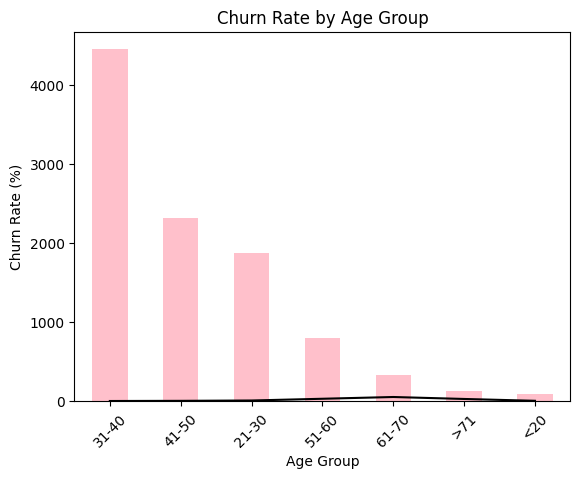

In [114]:
# Customers Churn Rate by Age 

age_group_stats = df.groupby('age_group').agg(
    churn_count=('churn', 'sum'),
    total_count=('churn', 'size')
)

# Tính tỷ lệ churn theo nhóm tuổi
age_group_stats['churn_rate'] = age_group_stats['churn_count'] / age_group_stats['total_count'] * 100
age_group= df['age_group'].value_counts()
print(age_group)
#

age_group_stats['churn_rate'].plot(kind='line', color='black')
age_group.plot(kind='bar', color='pink')

plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Customers Churn Rate by Age 

age_group_stats = df.groupby('age_group').agg(
    churn_count=('churn', 'sum'),
    total_count=('churn', 'size')
)

# Tính tỷ lệ churn theo nhóm tuổi
age_group_stats['churn_rate'] = age_group_stats['churn_count'] / age_group_stats['total_count'] * 100
age_group= df['age_group'].value_counts()
print(age_group)
#

age_group_stats['churn_rate'].plot(kind='line', color='black')
age_group.plot(kind='bar', color='pink')

plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()